### K-Means Clusterting

In [41]:
%pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [42]:
from warnings import filterwarnings
filterwarnings('ignore')

### Read the mall customers dataset

In [43]:
import pandas as pd
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [45]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [46]:
df.duplicated().sum()

0

In [47]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [48]:
df.columns = ['CustomerID', 'Gender', 'Age', 'Income', 'Spend']
df.head()

,CustomerID,Gender,Age,Income,Spend
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Classify Similar customers on basis of Income and Spend

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

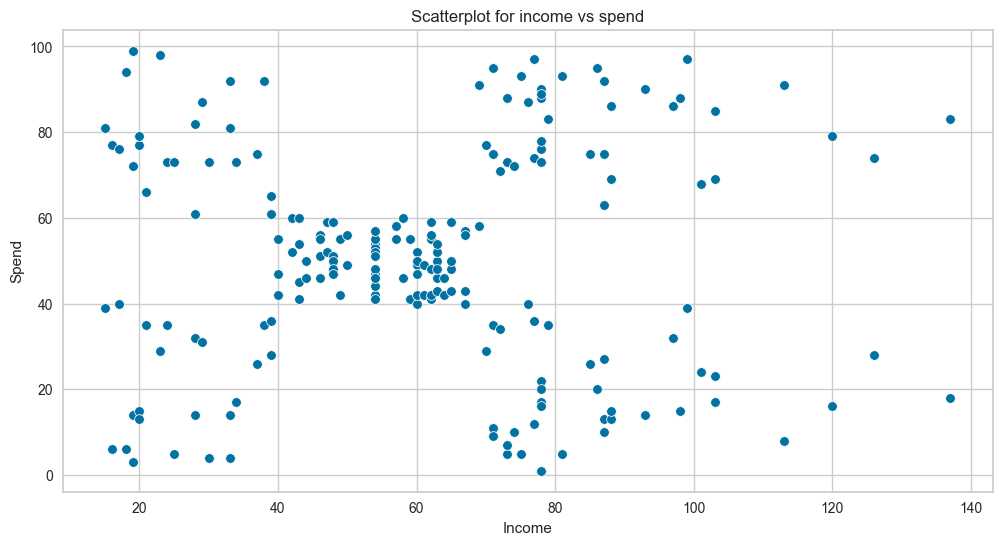

In [50]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Income', y='Spend')
plt.title('Scatterplot for income vs spend')
plt.show()

### Seperate X value from your data

In [51]:
X = df[['Income', 'Spend']]
X.head()

,Income,Spend
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


### Preprocess the X data

In [52]:
from sklearn.pipeline import Pipeline 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [53]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                           ('scaler', StandardScaler())]).set_output(transform='pandas')

In [54]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,Income,Spend
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


### For Kmean method find Optimal value of K with Elbow method

In [55]:
from yellowbrick.cluster.elbow import kelbow_visualizer
from sklearn.cluster import KMeans

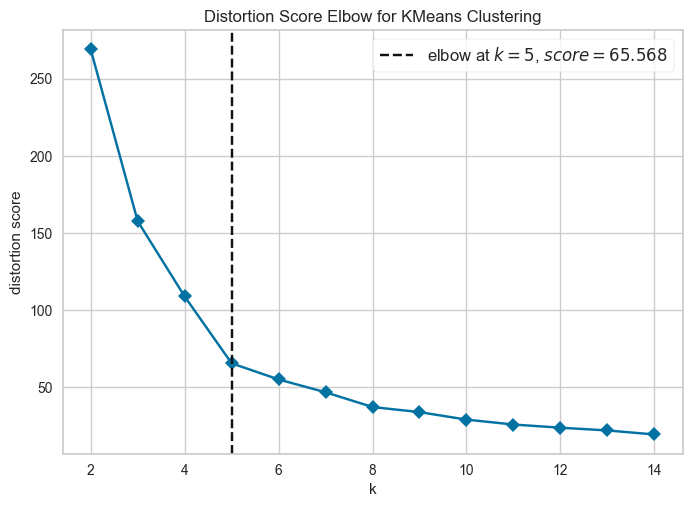

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=14), k=(2, 15), timings=False)

In [56]:
kelbow_visualizer(KMeans(),
                  X_pre,
                  k=(2, 15),
                  timings=False)

### Create a KMeans model with number of clusters as 5

In [57]:
model = KMeans(n_clusters=5)
model.fit(X_pre)

KMeans(n_clusters=5)

In [58]:
model.labels_

array([2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1,
       2, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 3, 1, 3, 0, 3, 0, 3,
       1, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3])

In [59]:
X.head()

,Income,Spend
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [60]:
X['Label']=model.labels_

In [61]:
X

,Income,Spend,Label
0,15,39,2
1,15,81,4
2,16,6,2
3,16,77,4
4,17,40,2
...,...,...,...
195,120,79,3
196,126,28,0
197,126,74,3
198,137,18,0


In [62]:
X['Label'].unique()

array([2, 4, 1, 3, 0])

In [63]:
X[X['Label']==0]

,Income,Spend,Label
124,70,29,0
128,71,11,0
130,71,9,0
134,73,5,0
136,73,7,0
138,74,10,0
140,75,5,0
144,77,12,0
146,77,36,0
148,78,22,0


In [64]:
X[X['Label']==1]

,Income,Spend,Label
43,39,61,1
46,40,55,1
47,40,47,1
48,40,42,1
49,40,42,1
...,...,...,...
121,67,40,1
122,69,58,1
126,71,35,1
132,72,34,1


In [65]:
X[X['Label']==2]

,Income,Spend,Label
0,15,39,2
2,16,6,2
4,17,40,2
6,18,6,2
8,19,3,2
10,19,14,2
12,20,15,2
14,20,13,2
16,21,35,2
18,23,29,2


In [66]:
X[X['Label']==3]

,Income,Spend,Label
123,69,91,3
125,70,77,3
127,71,95,3
129,71,75,3
131,71,75,3
133,72,71,3
135,73,88,3
137,73,73,3
139,74,72,3
141,75,93,3


In [67]:
X[X['Label']==4]

,Income,Spend,Label
1,15,81,4
3,16,77,4
5,17,76,4
7,18,94,4
9,19,72,4
11,19,99,4
13,20,77,4
15,20,79,4
17,21,66,4
19,23,98,4


### Visualize above clusters

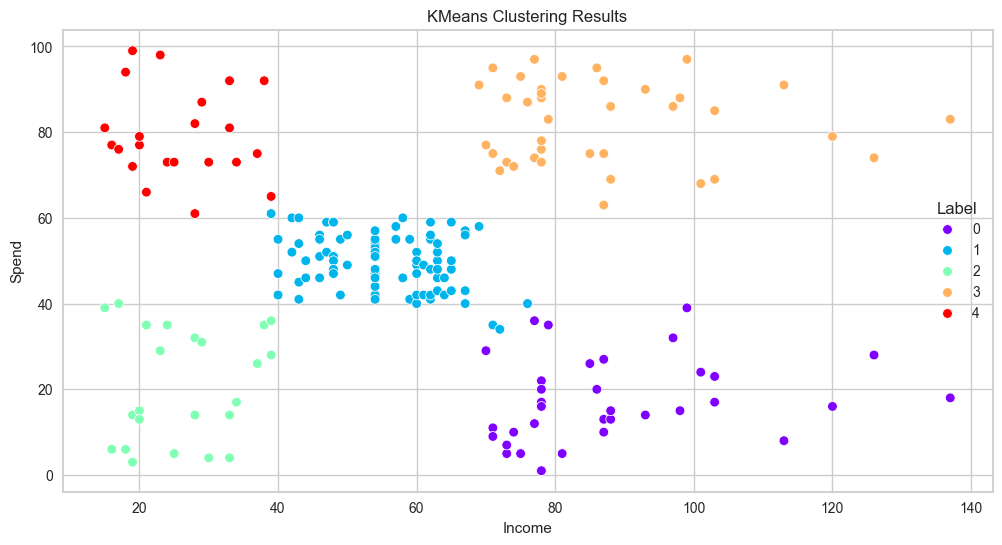

In [68]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=X, x='Income', y='Spend', hue='Label', palette='rainbow')
plt.title('KMeans Clustering Results')
plt.show()

### Cluster Similar customers on basis of age, income and Spending

In [69]:
X2 = df[['Age', 'Income', 'Spend']]
X2

,Age,Income,Spend
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [70]:
num_pipe2 = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                            ('scaler', StandardScaler())]).set_output(transform='pandas')

In [71]:
X2_pre = num_pipe2.fit_transform(X2)
X2_pre.head()

,Age,Income,Spend
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


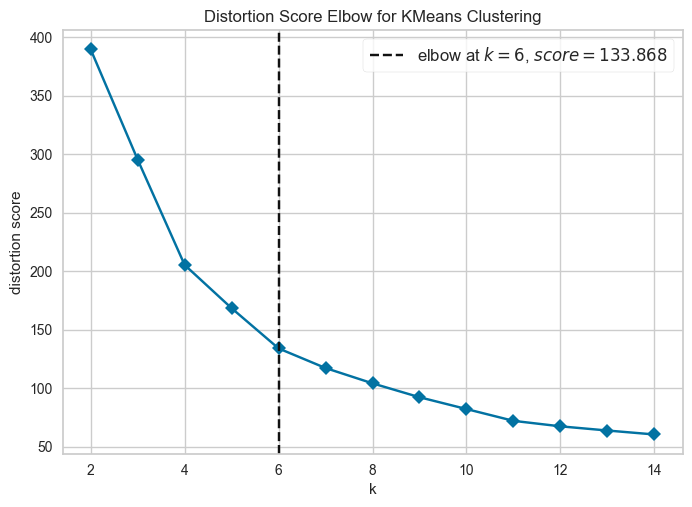

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=14), k=(2, 15), timings=False)

In [72]:
kelbow_visualizer(KMeans(),
                  X2_pre,
                  k=(2, 15),
                  timings=False)

In [73]:
model2 = KMeans(n_clusters=6)
model2.fit(X2_pre)

KMeans(n_clusters=6)

In [74]:
model2.labels_

array([0, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 1, 0, 4, 5,
       4, 0, 1, 5, 5, 5, 1, 5, 5, 1, 1, 1, 1, 1, 5, 1, 1, 5, 1, 1, 1, 5,
       1, 1, 5, 5, 1, 1, 1, 1, 1, 5, 1, 5, 5, 1, 1, 5, 1, 1, 5, 1, 1, 5,
       5, 1, 1, 5, 1, 5, 5, 5, 1, 5, 1, 5, 5, 1, 1, 5, 1, 5, 1, 1, 1, 1,
       1, 5, 5, 5, 5, 5, 1, 1, 1, 1, 5, 5, 5, 3, 5, 3, 2, 3, 2, 3, 2, 3,
       5, 3, 2, 3, 2, 3, 5, 3, 2, 3, 5, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3])

In [75]:
X2['Label'] = model2.labels_

In [76]:
X2.head()

,Age,Income,Spend,Label
0,19,15,39,0
1,21,15,81,0
2,20,16,6,4
3,23,16,77,0
4,31,17,40,4


In [77]:
X2['Label'].unique()

array([0, 4, 1, 5, 3, 2])

In [78]:
for i in range(6):
    print(f'Cluster Number : {i}\n')
    display(X2[X2['Label']==i])
    print('\n=====================================================\n')

Cluster Number : 0



,Age,Income,Spend,Label
0,19,15,39,0
1,21,15,81,0
3,23,16,77,0
5,22,17,76,0
7,23,18,94,0
9,30,19,72,0
11,35,19,99,0
13,24,20,77,0
15,22,20,79,0
17,20,21,66,0




Cluster Number : 1



,Age,Income,Spend,Label
40,65,38,35,1
46,50,40,55,1
50,49,42,52,1
53,59,43,60,1
54,50,43,45,1
55,47,43,41,1
56,51,44,50,1
57,69,44,46,1
59,53,46,46,1
60,70,46,56,1




Cluster Number : 2



,Age,Income,Spend,Label
126,43,71,35,2
128,59,71,11,2
130,47,71,9,2
134,20,73,5,2
136,44,73,7,2
140,57,75,5,2
144,25,77,12,2
146,48,77,36,2
148,34,78,22,2
150,43,78,17,2




Cluster Number : 3



,Age,Income,Spend,Label
123,39,69,91,3
125,31,70,77,3
127,40,71,95,3
129,38,71,75,3
131,39,71,75,3
133,31,72,71,3
135,29,73,88,3
137,32,73,73,3
139,35,74,72,3
141,32,75,93,3




Cluster Number : 4



,Age,Income,Spend,Label
2,20,16,6,4
4,31,17,40,4
6,35,18,6,4
8,64,19,3,4
10,67,19,14,4
12,58,20,15,4
14,37,20,13,4
16,35,21,35,4
18,52,23,29,4
20,35,24,35,4




Cluster Number : 5



,Age,Income,Spend,Label
43,31,39,61,5
47,27,40,47,5
48,29,40,42,5
49,31,40,42,5
51,33,42,60,5
52,31,43,54,5
58,27,46,51,5
61,19,46,55,5
65,18,48,59,5
68,19,48,59,5


### Install Plotly and nbformat

In [79]:
%pip install plotly nbformat

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### Visualize the 3d scatterplot for clustering

In [80]:
import plotly.express as px

In [81]:
fig = px.scatter_3d(data_frame=X2, x='Age', y='Income', z='Spend', color='Label')
fig.show()